Name:Rithvik Rajesh Matta<br>
Srn:PES2UG23CS485

### Correlation Analysis
UE23CS342AA2 - Data Analytics (S Sri Shaatvika - srishaatvika@gmail.com) <br>
There are 5 sections in this worksheet covering different topics


In [1]:
library(dplyr)
library(ggplot2)
library(readr)
library(lubridate)




Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




# About the Dataset
**This analysis uses two datasets to explore the relationship between CO₂ levels and global temperatures:<br>
carbon-dioxide: Contains monthly atmospheric CO₂ concentrations (ppm) recorded at Mauna Loa Observatory from 1958 onward.<br> 
climate-change-earth-surface-temperature: Provides monthly global temperature averages (land, ocean, combined) from 1850 onward, compiled by Berkeley Earth. For this worksheet we will be using the GlobalTemperatures.csv dataset.**

**We focus on yearly averages and investigate how rising CO₂ levels relate to changes in global surface temperatures over time.** 



# Section 1: Data Loading and Exploration

In [3]:
#loading dataset 
temp_df <- read.csv("/kaggle/input/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv")
head(temp_df)

co2_df <- read.csv("/kaggle/input/carbon-dioxide/archive.csv")
head(co2)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1750-01-01,3.034,3.574,NA,NA,NA,NA,NA,NA
2,1750-02-01,3.083,3.702,NA,NA,NA,NA,NA,NA
3,1750-03-01,5.626,3.076,NA,NA,NA,NA,NA,NA
4,1750-04-01,8.490,2.451,NA,NA,NA,NA,NA,NA
5,1750-05-01,11.573,2.072,NA,NA,NA,NA,NA,NA
6,1750-06-01,12.937,1.724,NA,NA,NA,NA,NA,NA


[1] 315.42 316.31 316.50 317.56 318.13 318.00

**Q1.1 (Optional but recommended) Analyse the columns and data structures. Rename them while performing analysis.**

In [6]:
names(temp_df) <- c("Date","LandAverageTemp","LandAverageTempUnc","LandMaxTemp","LandMaxTempUnc",
                    "LandMinTemp","LandMinTempUnc","LandOceanTemp","LandOceanTempUnc")

names(co2_df) <- c("Year","Month","InterpolatedCO2","TrendCO2")

temp_df$Date <- as.Date(temp_df$Date, format="%Y-%m-%d")
temp_df$Year <- format(temp_df$Date, "%Y")

co2_df <- co2_df[, c("Year","Month","InterpolatedCO2","TrendCO2")]
co2_df$Date <- as.Date(paste(co2_df$Year, co2_df$Month, "01", sep="-"))


'data.frame':	3192 obs. of  11 variables:
 $ Date              : Date, format: "1750-01-01" "1750-02-01" ...
 $ LandAverageTemp   : num  3.03 3.08 5.63 8.49 11.57 ...
 $ LandAverageTempUnc: num  3.57 3.7 3.08 2.45 2.07 ...
 $ LandMaxTemp       : num  NA NA NA NA NA NA NA NA NA NA ...
 $ LandMaxTempUnc    : num  NA NA NA NA NA NA NA NA NA NA ...
 $ LandMinTemp       : num  NA NA NA NA NA NA NA NA NA NA ...
 $ LandMinTempUnc    : num  NA NA NA NA NA NA NA NA NA NA ...
 $ LandOceanTemp     : num  NA NA NA NA NA NA NA NA NA NA ...
 $ LandOceanTempUnc  : num  NA NA NA NA NA NA NA NA NA NA ...
 $ NA                : chr  "1750" "1750" "1750" "1750" ...
 $ Year              : chr  "1750" "1750" "1750" "1750" ...
'data.frame':	720 obs. of  5 variables:
 $ Year           : int  1958 1958 1958 1958 1958 1958 1958 1958 1958 1958 ...
 $ Month          : int  1 2 3 4 5 6 7 8 9 10 ...
 $ InterpolatedCO2: num  1958 1958 1958 1958 1958 ...
 $ TrendCO2       : num  NA NA 316 317 318 ...
 $ Date        

# Section 2: Data Cleaning and Pre-processing <br>
Prepare the datasets for analysis by handling missing values, standardizing formats, and ensuring data consistency.



**Q 2.1 Identify and handle any missing values in both datasets. Justify your approach**

In [10]:

head(temp_df)
head(co2_df)

str(temp_df)
str(co2_df)



,Date,LandAverageTemp,LandAverageTempUnc,LandMaxTemp,LandMaxTempUnc,LandMinTemp,LandMinTempUnc,LandOceanTemp,LandOceanTempUnc,NA,Year
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,1750-01-01,3.034,3.574,NA,NA,NA,NA,NA,NA,1750,1750
2,1750-02-01,3.083,3.702,NA,NA,NA,NA,NA,NA,1750,1750
3,1750-03-01,5.626,3.076,NA,NA,NA,NA,NA,NA,1750,1750
4,1750-04-01,8.490,2.451,NA,NA,NA,NA,NA,NA,1750,1750
5,1750-05-01,11.573,2.072,NA,NA,NA,NA,NA,NA,1750,1750
6,1750-06-01,12.937,1.724,NA,NA,NA,NA,NA,NA,1750,1750


,Year,Month,InterpolatedCO2,TrendCO2,Date
,<dbl>,<int>,<dbl>,<dbl>,<date>
1,1958,1,1958.041,NA,1958-01-01
2,1958,2,1958.126,NA,1958-02-01
3,1958,3,1958.203,315.69,1958-03-01
4,1958,4,1958.288,317.45,1958-04-01
5,1958,5,1958.370,317.50,1958-05-01
6,1958,6,1958.455,NA,1958-06-01


'data.frame':	3192 obs. of  11 variables:
 $ Date              : Date, format: "1750-01-01" "1750-02-01" ...
 $ LandAverageTemp   : num  3.03 3.08 5.63 8.49 11.57 ...
 $ LandAverageTempUnc: num  3.57 3.7 3.08 2.45 2.07 ...
 $ LandMaxTemp       : num  NA NA NA NA NA NA NA NA NA NA ...
 $ LandMaxTempUnc    : num  NA NA NA NA NA NA NA NA NA NA ...
 $ LandMinTemp       : num  NA NA NA NA NA NA NA NA NA NA ...
 $ LandMinTempUnc    : num  NA NA NA NA NA NA NA NA NA NA ...
 $ LandOceanTemp     : num  NA NA NA NA NA NA NA NA NA NA ...
 $ LandOceanTempUnc  : num  NA NA NA NA NA NA NA NA NA NA ...
 $ NA                : chr  "1750" "1750" "1750" "1750" ...
 $ Year              : num  1750 1750 1750 1750 1750 1750 1750 1750 1750 1750 ...
'data.frame':	720 obs. of  5 variables:
 $ Year           : num  1958 1958 1958 1958 1958 ...
 $ Month          : int  1 2 3 4 5 6 7 8 9 10 ...
 $ InterpolatedCO2: num  1958 1958 1958 1958 1958 ...
 $ TrendCO2       : num  NA NA 316 317 318 ...
 $ Date           

Temperature dataset: The years 1750–1849 were excluded because they contain many missing values and sparse records. This ensures the analysis is based only on reliable and consistent measurements.

CO₂ dataset: Rows with missing TrendCO₂ values were removed to avoid errors or bias in the trend analysis. Since InterpolatedCO₂ values are available for all months, the data loss is minimal.

**Q 2.2 The Date columns are not properly formatted for merging datasets or to perform any analysis. Clean the date column in both datasets and merge based on "Year"** <br>
*Hint: You will have to average annual temperatures in the temperatures dataframe and the monthly CO2 values in the CO2 values dataframe.*
*Ensure that you do this for all the temperature metrics*

In [16]:
library(dplyr)

# --- Fix column names first ---
# Option 1: Auto-fix all column names (appends X for blanks/dupes)
colnames(temp_df) <- make.names(colnames(temp_df), unique = TRUE)

# (Optional) Check names after repair
print(colnames(temp_df))

# --- Convert Year columns ---
temp_df$Year <- as.numeric(temp_df$Year)
co2_df$Year <- as.numeric(co2_df$Year)

# --- Aggregate temperature data by year ---
temp_yearly <- temp_df %>%
  group_by(Year) %>%
  summarise(
    LandAverageTemp     = mean(LandAverageTemp, na.rm = TRUE),
    LandAverageTempUnc  = mean(LandAverageTempUnc, na.rm = TRUE),
    LandMaxTemp         = mean(LandMaxTemp, na.rm = TRUE),
    LandMaxTempUnc      = mean(LandMaxTempUnc, na.rm = TRUE),
    LandMinTemp         = mean(LandMinTemp, na.rm = TRUE),
    LandMinTempUnc      = mean(LandMinTempUnc, na.rm = TRUE),
    LandOceanTemp       = mean(LandOceanTemp, na.rm = TRUE),
    LandOceanTempUnc    = mean(LandOceanTempUnc, na.rm = TRUE)
  )

# --- Aggregate CO₂ data by year ---
co2_yearly <- co2_df %>%
  group_by(Year) %>%
  summarise(
    InterpolatedCO2 = mean(InterpolatedCO2, na.rm = TRUE),
    TrendCO2        = mean(TrendCO2, na.rm = TRUE)
  )

# --- Merge datasets ---
climate_co2 <- merge(temp_yearly, co2_yearly, by = "Year")

# --- Inspect result ---
head(climate_co2)
str(climate_co2)


 [1] "Date"               "LandAverageTemp"    "LandAverageTempUnc"
 [4] "LandMaxTemp"        "LandMaxTempUnc"     "LandMinTemp"       
 [7] "LandMinTempUnc"     "LandOceanTemp"      "LandOceanTempUnc"  
[10] "NA."                "Year"              


,Year,LandAverageTemp,LandAverageTempUnc,LandMaxTemp,LandMaxTempUnc,LandMinTemp,LandMinTempUnc,LandOceanTemp,LandOceanTempUnc,InterpolatedCO2,TrendCO2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1958,8.773750,0.10433333,14.47750,0.1610000,3.114500,0.1725833,15.38208,0.07450000,1958.497,315.3300
2,1959,8.732667,0.10716667,14.41650,0.1500833,3.108583,0.1491667,15.34050,0.07391667,1959.497,315.9817
3,1960,8.583750,0.09350000,14.31742,0.1494167,2.932583,0.1375833,15.29192,0.06933333,1960.498,316.9083
4,1961,8.797667,0.09700000,14.51492,0.1657500,3.128750,0.1817500,15.37992,0.06716667,1961.497,317.6450
5,1962,8.745917,0.13291667,14.54017,0.1589167,3.008583,0.2044167,15.32558,0.07250000,1962.497,318.4533
6,1963,8.856000,0.09233333,14.61225,0.1527500,3.157583,0.1824167,15.37667,0.06833333,1963.497,318.9925


'data.frame':	58 obs. of  11 variables:
 $ Year              : num  1958 1959 1960 1961 1962 ...
 $ LandAverageTemp   : num  8.77 8.73 8.58 8.8 8.75 ...
 $ LandAverageTempUnc: num  0.1043 0.1072 0.0935 0.097 0.1329 ...
 $ LandMaxTemp       : num  14.5 14.4 14.3 14.5 14.5 ...
 $ LandMaxTempUnc    : num  0.161 0.15 0.149 0.166 0.159 ...
 $ LandMinTemp       : num  3.11 3.11 2.93 3.13 3.01 ...
 $ LandMinTempUnc    : num  0.173 0.149 0.138 0.182 0.204 ...
 $ LandOceanTemp     : num  15.4 15.3 15.3 15.4 15.3 ...
 $ LandOceanTempUnc  : num  0.0745 0.0739 0.0693 0.0672 0.0725 ...
 $ InterpolatedCO2   : num  1958 1959 1960 1961 1962 ...
 $ TrendCO2          : num  315 316 317 318 318 ...


# Section 3: Correlation Analysis
Correlation analysis is a statistical method used to measure the strength and direction of a relationship between two variables.<br>
The result is a correlation coefficient ranging from -1 to +1:<br>
* +1: Perfect positive correlation (both increase together)
* 0: No correlation
* –1: Perfect negative correlation (one increases, the other decreases)

We will be dealing with Pearson coefficient in this section

**Q3.1 Calculate the Pearson correlation coefficient between the CO2 concentration and the different temperature metrics**

In [17]:
cor_LandAverageTemp <- cor(climate_co2$TrendCO2, climate_co2$LandAverageTemp, method = "pearson")
cor_LandMaxTemp <- cor(climate_co2$TrendCO2, climate_co2$LandMaxTemp, method = "pearson")
cor_LandMinTemp <- cor(climate_co2$TrendCO2, climate_co2$LandMinTemp, method = "pearson")
cor_LandOceanTemp <- cor(climate_co2$TrendCO2, climate_co2$LandOceanTemp, method = "pearson")

cor_results <- data.frame(
  TemperatureMetric = c("LandAverageTemp", "LandMaxTemp", "LandMinTemp", "LandOceanTemp"),
  PearsonCorrelation = c(cor_LandAverageTemp, cor_LandMaxTemp, cor_LandMinTemp, cor_LandOceanTemp)
)

print(cor_results)


  TemperatureMetric PearsonCorrelation
1   LandAverageTemp          0.9029036
2       LandMaxTemp          0.8943414
3       LandMinTemp          0.8961389
4     LandOceanTemp          0.9172674


**Q3.2 Visualise the values using line graphs and scatter plots for each temperature metric**

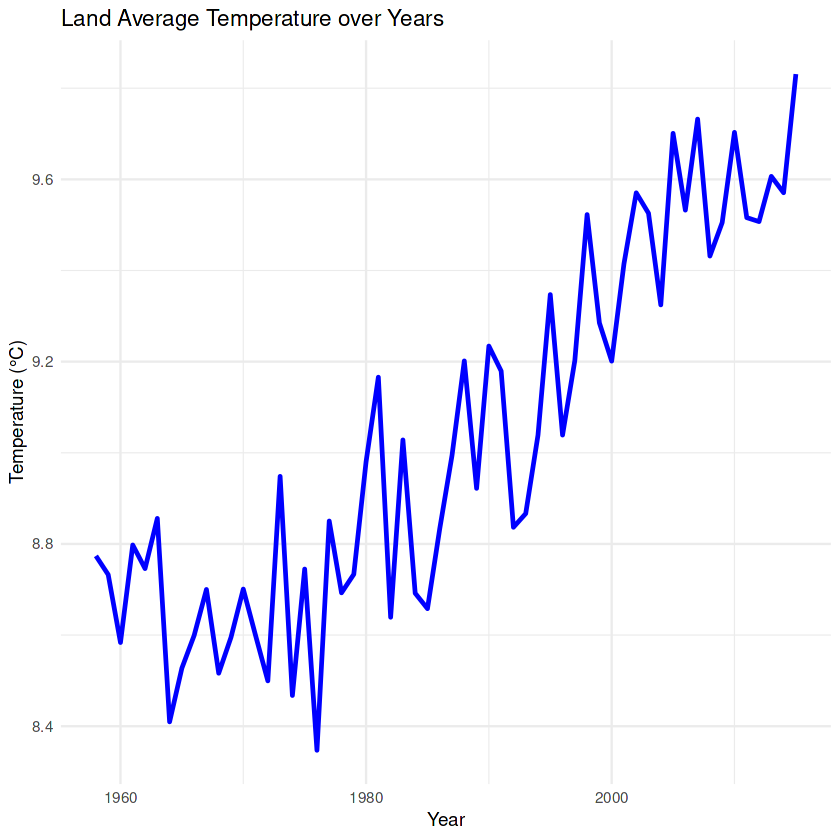

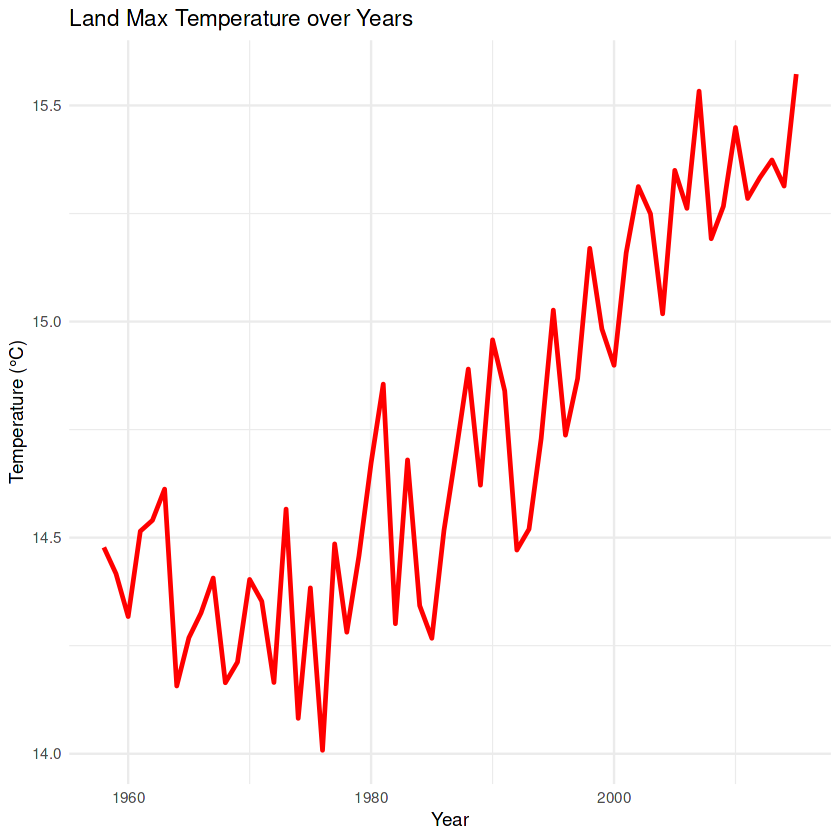

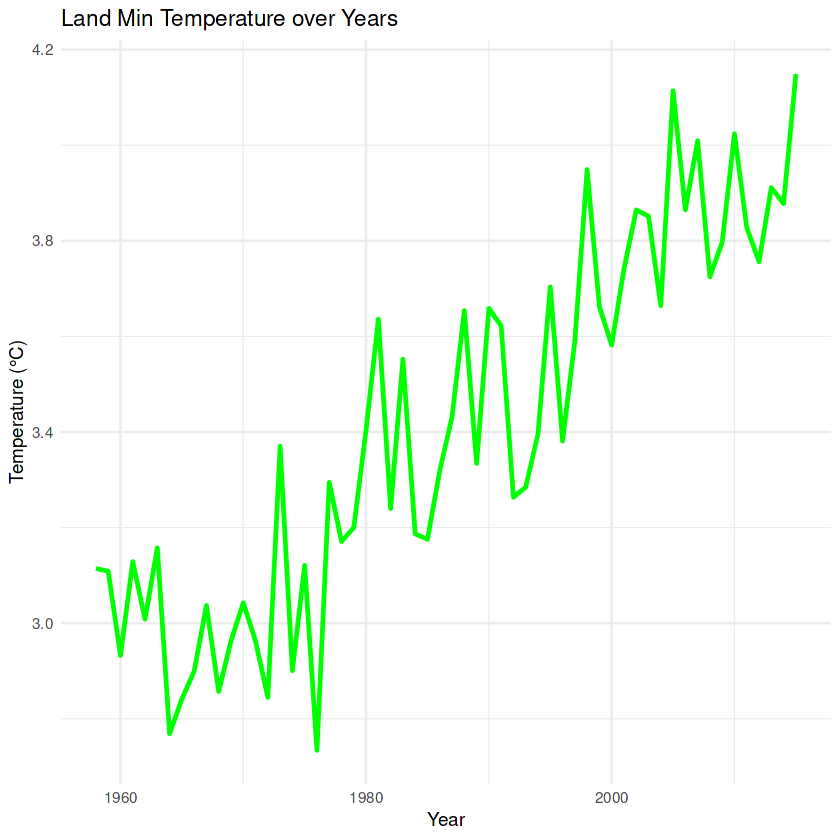

`geom_smooth()` using formula = 'y ~ x'


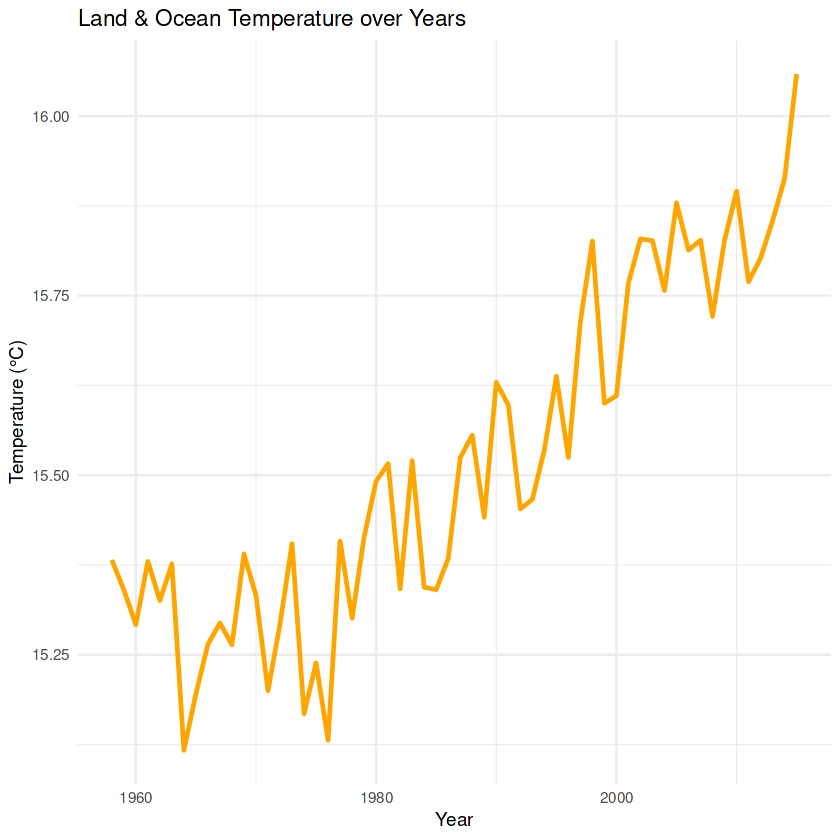

`geom_smooth()` using formula = 'y ~ x'


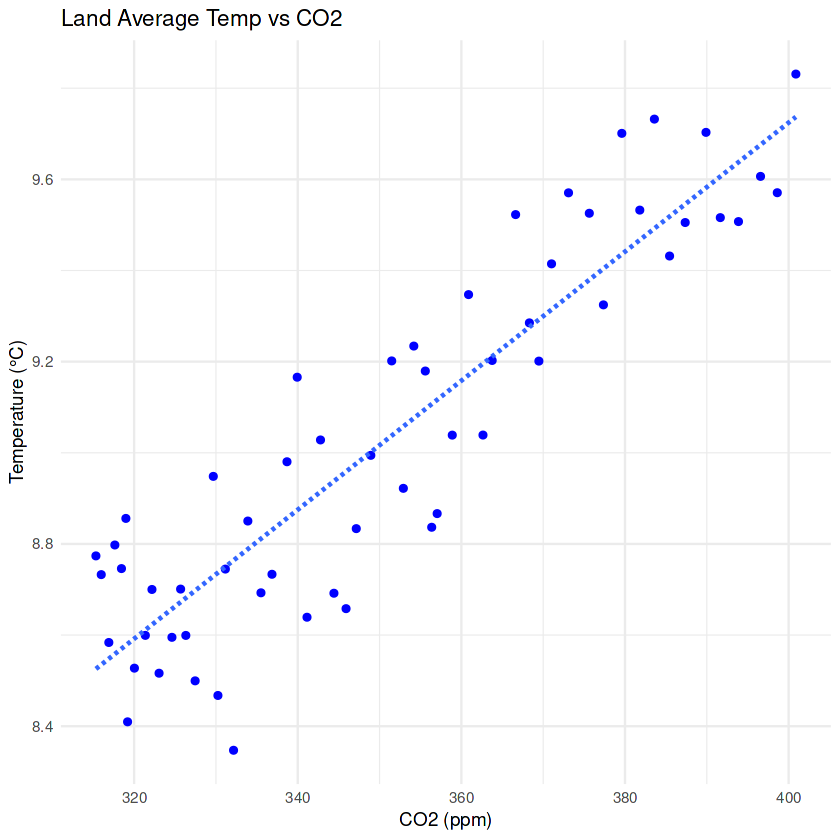

`geom_smooth()` using formula = 'y ~ x'


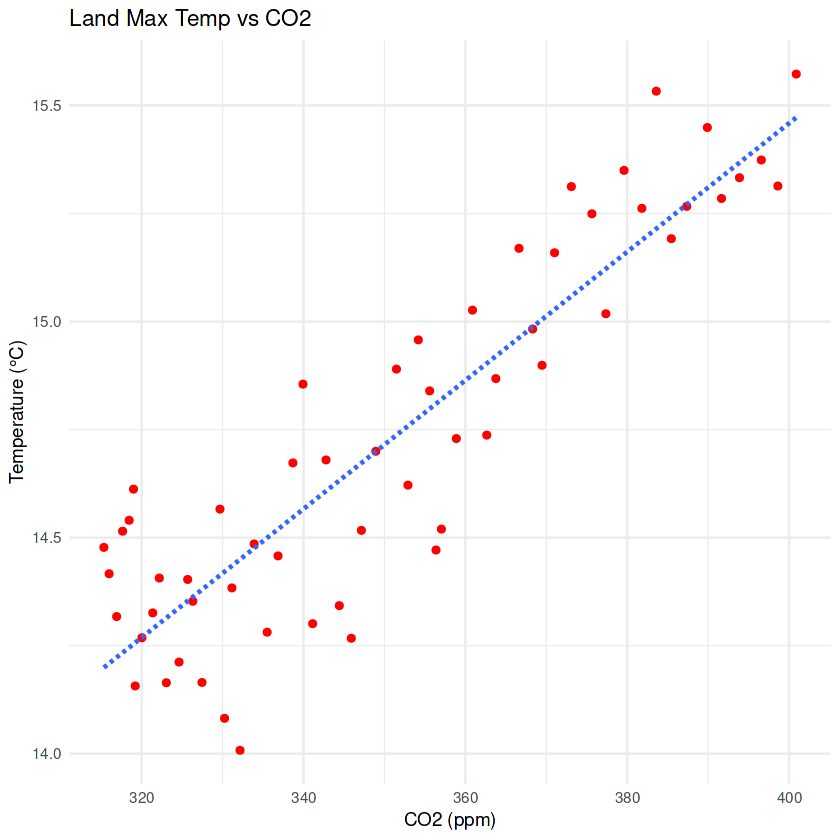

`geom_smooth()` using formula = 'y ~ x'


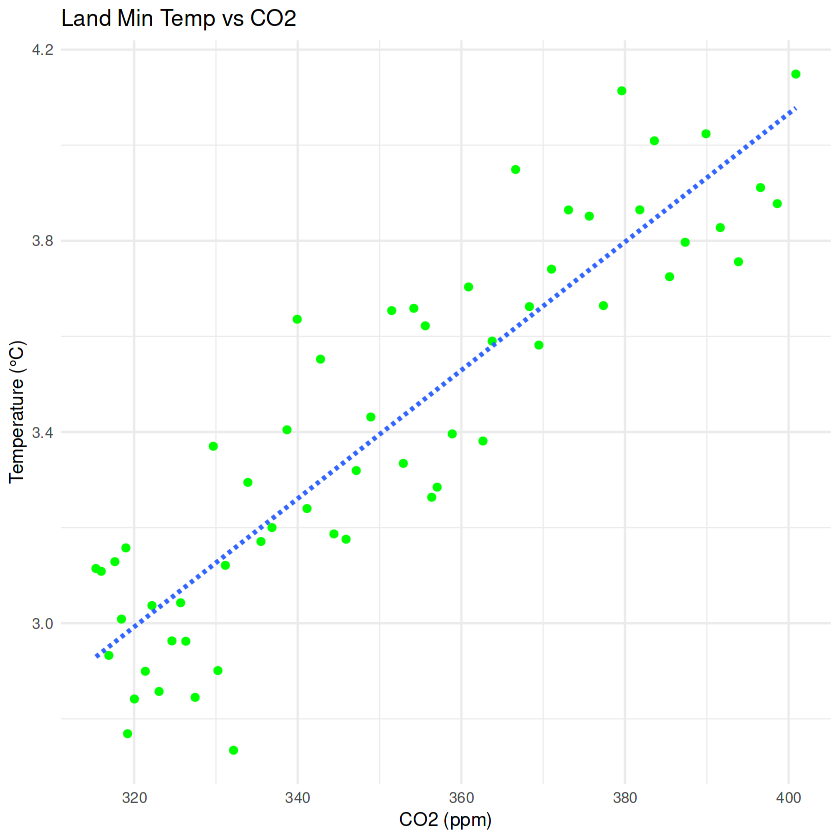

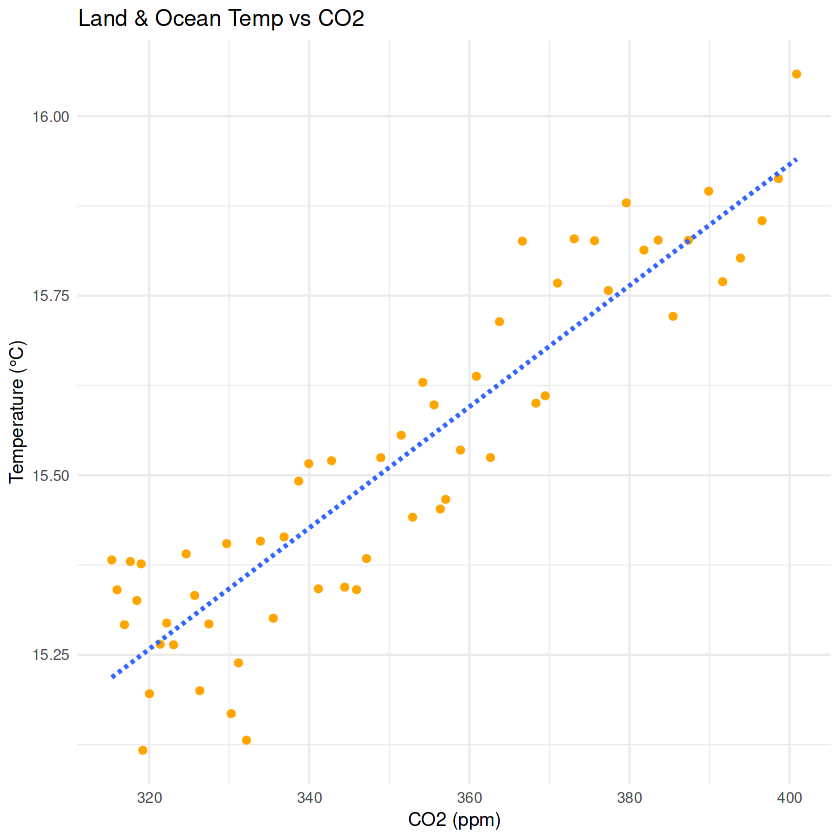

In [18]:
library(ggplot2)


ggplot(climate_co2, aes(x = Year, y = LandAverageTemp)) +
  geom_line(linewidth = 1, color = "blue") +
  labs(title = "Land Average Temperature over Years", y = "Temperature (°C)", x = "Year") +
  theme_minimal()

ggplot(climate_co2, aes(x = Year, y = LandMaxTemp)) +
  geom_line(linewidth = 1, color = "red") +
  labs(title = "Land Max Temperature over Years", y = "Temperature (°C)", x = "Year") +
  theme_minimal()

ggplot(climate_co2, aes(x = Year, y = LandMinTemp)) +
  geom_line(linewidth = 1, color = "green") +
  labs(title = "Land Min Temperature over Years", y = "Temperature (°C)", x = "Year") +
  theme_minimal()

ggplot(climate_co2, aes(x = Year, y = LandOceanTemp)) +
  geom_line(linewidth = 1, color = "orange") +
  labs(title = "Land & Ocean Temperature over Years", y = "Temperature (°C)", x = "Year") +
  theme_minimal()


ggplot(climate_co2, aes(x = TrendCO2, y = LandAverageTemp)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", se = FALSE, linetype = "dashed") +
  labs(title = "Land Average Temp vs CO2", y = "Temperature (°C)", x = "CO2 (ppm)") +
  theme_minimal()

ggplot(climate_co2, aes(x = TrendCO2, y = LandMaxTemp)) +
  geom_point(color = "red") +
  geom_smooth(method = "lm", se = FALSE, linetype = "dashed") +
  labs(title = "Land Max Temp vs CO2", y = "Temperature (°C)", x = "CO2 (ppm)") +
  theme_minimal()

ggplot(climate_co2, aes(x = TrendCO2, y = LandMinTemp)) +
  geom_point(color = "green") +
  geom_smooth(method = "lm", se = FALSE, linetype = "dashed") +
  labs(title = "Land Min Temp vs CO2", y = "Temperature (°C)", x = "CO2 (ppm)") +
  theme_minimal()

ggplot(climate_co2, aes(x = TrendCO2, y = LandOceanTemp)) +
  geom_point(color = "orange") +
  geom_smooth(method = "lm", se = FALSE, linetype = "dashed") +
  labs(title = "Land & Ocean Temp vs CO2", y = "Temperature (°C)", x = "CO2 (ppm)") +
  theme_minimal()


**Q3.3: Compare the strength of these correlations. Which temperature metric is most strongly associated with CO2? Why might that be?<br>
Q3.4: Briefly explain the conceptual difference between Pearson correlation and Spearman's Rank Correlation. In what scenario might Spearman's correlation be more appropriate for analyzing the relationship between CO2 and temperature, even if they appear broadly linearly related?** <br>
*Bonus: explore correlation calculation of monotonic values. (Kendall's tau relation)*


Strength of Correlations:
All correlation values are very strong (> 0.89), indicating a consistent and reliable relationship between temperature metrics and CO₂ levels.

Most Strongly Associated Metric:

LandOceanTemp (correlation = 0.9173)

Reasoning:
LandOceanTemp incorporates both land and ocean temperature data, making it a more comprehensive representation of global temperature trends. Since CO₂ influences the entire climate system, the combined land–ocean metric captures its effects more accurately than land-only measures.

In [22]:
library(dplyr)
library(tidyr)   # required for drop_na()

temp_df_clean <- temp_df %>%
  filter(as.numeric(format(Date, "%Y")) >= 1850) %>%
  drop_na(LandAverageTemp, LandMaxTemp, LandMinTemp, LandOceanTemp)

co2_df_clean <- co2_df %>%
  drop_na(TrendCO2)

annual_temp <- temp_df_clean %>%
  group_by(Year) %>%
  summarise(
    LandAverageTemp = mean(LandAverageTemp, na.rm = TRUE),
    LandMaxTemp = mean(LandMaxTemp, na.rm = TRUE),
    LandMinTemp = mean(LandMinTemp, na.rm = TRUE),
    LandOceanTemp = mean(LandOceanTemp, na.rm = TRUE)
  )

annual_co2 <- co2_df_clean %>%
  group_by(Year) %>%
  summarise(
    TrendCO2 = mean(TrendCO2, na.rm = TRUE)
  )

annual_data <- merge(annual_temp, annual_co2, by = "Year")

temp_metrics <- annual_data %>%
  select(LandAverageTemp, LandMaxTemp, LandMinTemp, LandOceanTemp)

co2 <- annual_data$TrendCO2

pearson_corr <- sapply(temp_metrics, function(x) cor(x, co2, method = "pearson"))

cor_comparison <- data.frame(
  TemperatureMetric = colnames(temp_metrics),
  PearsonCorrelation = round(pearson_corr, 7)
)



In [23]:
#3.4
library(dplyr)

temp_metrics <- annual_data %>%
  select(LandAverageTemp, LandMaxTemp, LandMinTemp, LandOceanTemp)

co2 <- annual_data$TrendCO2

spearman_corr <- sapply(temp_metrics, function(x) cor(x, co2, method = "spearman"))
kendall_corr <- sapply(temp_metrics, function(x) cor(x, co2, method = "kendall"))

cor_comparison <- data.frame(
  TemperatureMetric = colnames(temp_metrics),
  SpearmanCorrelation = round(spearman_corr, 7),
  KendallTau = round(kendall_corr, 7)
)

cor_comparison


,TemperatureMetric,SpearmanCorrelation,KendallTau
,<chr>,<dbl>,<dbl>
LandAverageTemp,LandAverageTemp,0.8645298,0.6721113
LandMaxTemp,LandMaxTemp,0.8456427,0.6636419
LandMinTemp,LandMinTemp,0.9005199,0.7071990
LandOceanTemp,LandOceanTemp,0.8959673,0.7180883


Conceptual Difference

Pearson Correlation

Measures the linear relationship between variables.

Sensitive to outliers.

Spearman Correlation

Measures the monotonic relationship using ranks.

Less affected by outliers.

Captures non-linear but monotonic trends.

When Spearman is More Appropriate

When the relationship is non-linear but monotonic (e.g., CO₂ vs. temperature).

When the dataset contains outliers that may distort Pearson correlation results.

Kendall’s Tau (Bonus)

Confirms the strength of monotonic association.

Useful for small datasets or when there are many tied values.

Results show a strong monotonic correlation for all temperature metrics, with LandOceanTemp having the highest Kendall’s Tau (0.718) → indicating it is most strongly associated with CO₂.

# Section 4: Hidden Variable and Causation

**Q4.1: While our analysis shows a strong correlation between Yearly_CO2_Concentration and GlobalAverageTemperature, can we definitively say that increasing CO2 causes the temperature to rise based solely on this correlation? Explain your reasoning and discuss why correlation does not imply causation. <br><br>
Q4.2: Beyond CO2, what other factors or "hidden variables" might influence global average temperatures? Briefly discuss how these factors could potentially make the relationship between CO2 and temperature seem more or less strong if not considered.**


4.1 – Can we say CO₂ causes temperature rise?

No. We cannot definitively say that increasing CO₂ causes temperature rise based solely on correlation.

Correlation ≠ Causation: Correlation only shows that the variables move together, not that one drives the other.

Hidden variables: Other factors like solar activity, volcanic eruptions, or ocean currents may also influence global temperatures.

Establishing causation: Requires controlled experiments and physical climate models, not just statistical correlation.

4.2 – Other factors influencing global average temperatures

Several additional factors besides CO₂ can affect temperature trends:

Solar activity → Changes in sunlight intensity can warm or cool the Earth.

Volcanic eruptions → Large eruptions release aerosols, temporarily cooling the atmosphere.

Ocean currents → Redistribution of heat across regions affects global climate.

Aerosols and pollutants → Reflect sunlight, reducing warming.

Land use changes → Deforestation and urbanization alter local and global heat balance.

Confounding Effects

If these hidden variables are not considered, they can distort the CO₂–temperature relationship:

A major volcanic eruption may lower temperatures despite rising CO₂.

A period of strong solar activity may exaggerate warming, falsely inflating the apparent correlation.

# Section 5: Missing Data Mechanisms

**Q5.1 From the dataset snippet identify missing data as Missing Completely At Random (MCAR), Missing At Random (MAR) and Missing Not At Random (MNAR). Justify** <br>
*Hint: read up about ozone sensors to answer this question*

In [ ]:
data <- read.csv("/kaggle/input/missing-data/missing_data.csv")

In [24]:
data <- read.csv("/kaggle/input/missing-data/missing_data.csv")
head(data)

,Station_ID,Location_Type,Humidity....,Ozone_Level..ppb.
,<chr>,<chr>,<int>,<chr>
1,ST001,Urban,45,30
2,ST002,Urban,90,missing
3,ST003,Rural,35,25
4,ST004,Urban,85,missing
5,ST005,Rural,50,28


  Station_ID        Location_Type       Humidity.... Ozone_Level..ppb.
 Length:5           Length:5           Min.   :35    Min.   :25.00    
 Class :character   Class :character   1st Qu.:45    1st Qu.:26.50    
 Mode  :character   Mode  :character   Median :50    Median :28.00    
                                       Mean   :61    Mean   :27.67    
                                       3rd Qu.:85    3rd Qu.:29.00    
                                       Max.   :90    Max.   :30.00    
                                                     NA's   :2        

Location_Type,Ozone_missing,Total,MissingPercent
<chr>,<int>,<int>,<dbl>
Rural,0,2,0.00000
Urban,2,3,66.66667


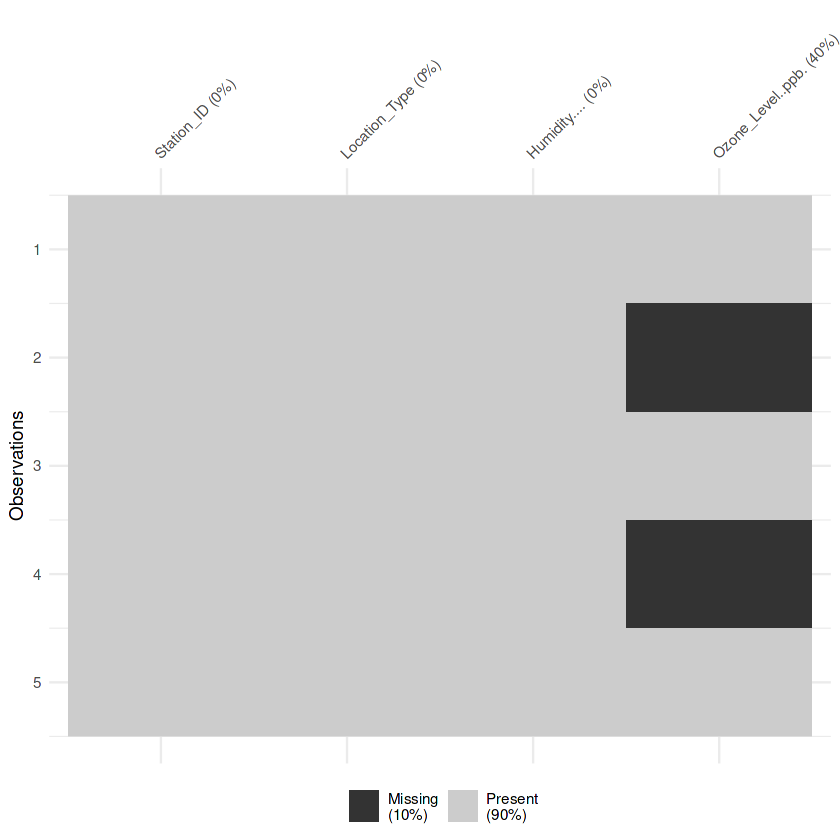

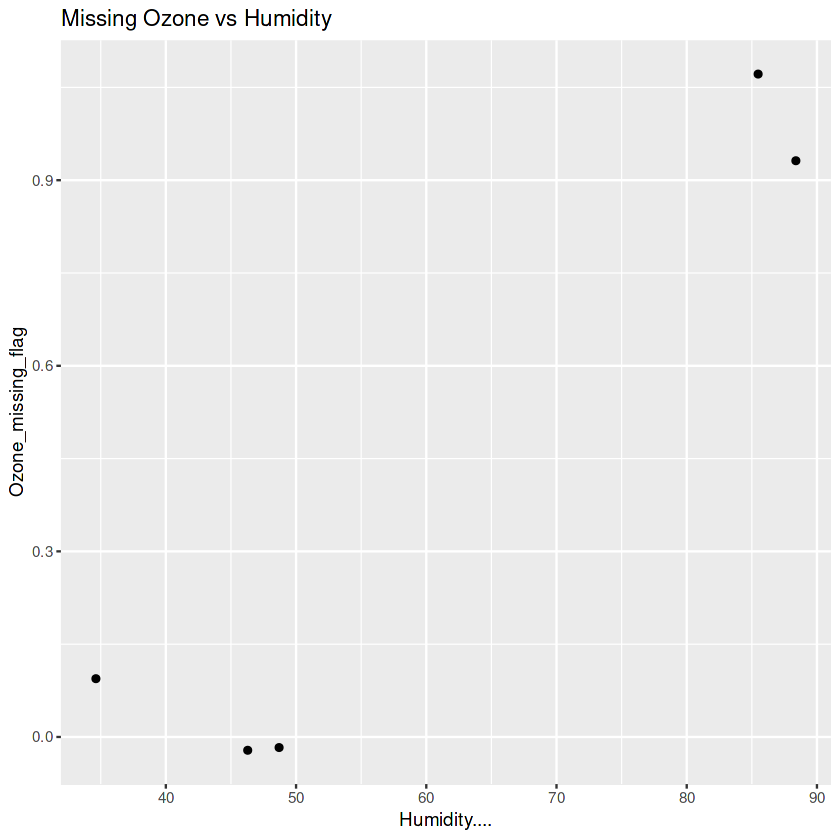

In [25]:
library(dplyr)
library(naniar)
library(ggplot2)

data <- read.csv("/kaggle/input/missing-data/missing_data.csv", stringsAsFactors = FALSE)

data$Ozone_Level..ppb.[data$Ozone_Level..ppb. == "missing"] <- NA
data$Ozone_Level..ppb. <- as.numeric(data$Ozone_Level..ppb.)

summary(data)
vis_miss(data)

data %>%
  group_by(Location_Type) %>%
  summarise(Ozone_missing = sum(is.na(Ozone_Level..ppb.)),
            Total = n(),
            MissingPercent = Ozone_missing/Total*100)

data$Ozone_missing_flag <- ifelse(is.na(data$Ozone_Level..ppb.), 1, 0)
ggplot(data, aes(x=Humidity...., y=Ozone_missing_flag)) +
  geom_jitter(height=0.1) +
  labs(title="Missing Ozone vs Humidity")


Types of Missingness in Ozone Data

MCAR (Missing Completely At Random):

Example: Some ozone readings may be missing due to occasional random sensor downtime, unrelated to ozone or any other measured variable.

Impact: Rare in practice; least problematic for analysis.

MAR (Missing At Random):

Example: Missing ozone values are more frequent in Urban stations (2 out of 3 missing) compared to Rural stations (0 missing), and may also depend on Humidity.

Meaning: The missingness depends on observed variables, so it is MAR.

Impact: Can be handled with appropriate statistical techniques (e.g., multiple imputation, regression models).

MNAR (Missing Not At Random):

Example: If ozone sensors fail specifically at extremely high or low ozone levels, missingness depends on the unobserved ozone concentration itself.

Impact: Most challenging to address since missingness depends on the missing value.

Summary

Mostly MAR → Missingness relates to observed factors (Location_Type, Humidity).

Some MNAR → Possible if failures occur at extreme ozone concentrations.

Minimal MCAR → Random sensor downtime.